<a href="https://colab.research.google.com/github/karthikheyaa17/AI---Workshop-2022/blob/main/EigenFaces_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

from sklearn.svm import SVC

import numpy as np

In [ ]:
lfw_ppl = fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [ ]:
n_samples, h, w = lfw_ppl.images.shape   #No of dataset

X = lfw_ppl.data
y = lfw_ppl.target  
n_features = X.shape[1]   #No of features/columns
target_names = lfw_ppl.target_names
n_classes = target_names.shape[0]  #No of categories/ class labels

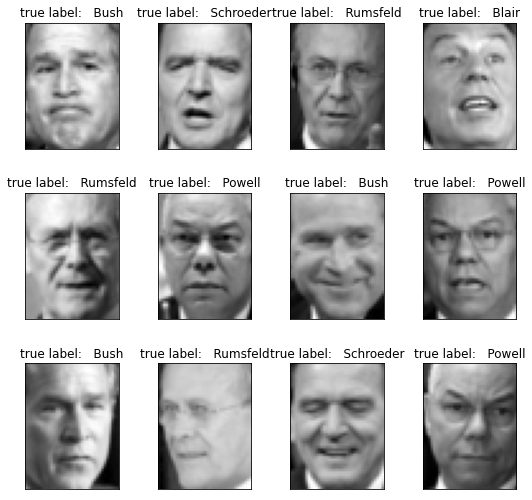

In [ ]:
# Function to plot images in 3 * 4 
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
 
# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)
 
true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [ ]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size = 0.20, random_state= 10)

print(X_tr.shape, X_tst.shape)

(912, 1850) (228, 1850)


In [ ]:
n_components = 200

pca = PCA(n_components = n_components).fit(X_tr)

eigenFaces = pca.components_.reshape((n_components, h, w))

X_tr_red = pca.transform(X_tr)
X_tst_red = pca.transform(X_tst)

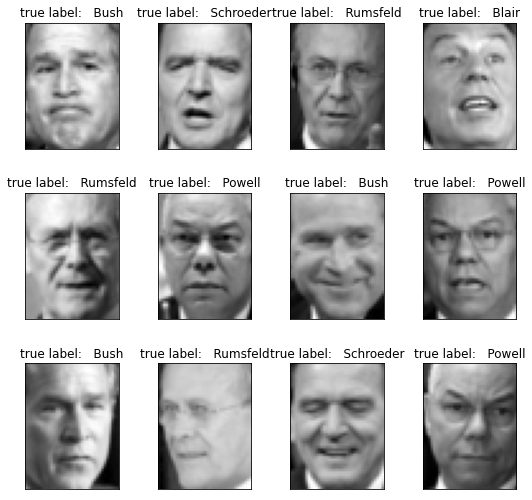

In [ ]:
plot_gallery(X, true_titles, h, w)

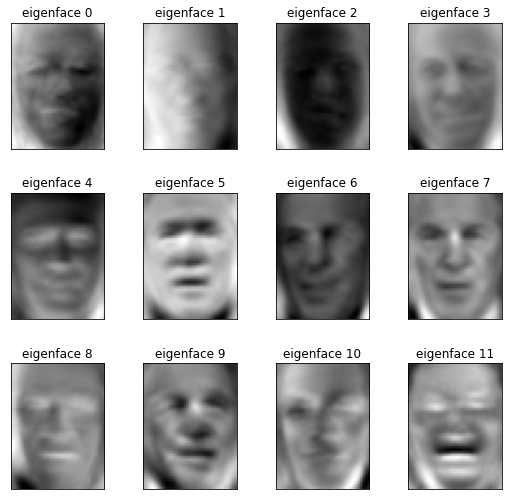

In [ ]:
eigenface_titles = ['eigenface %d' %i for i in range(eigenFaces.shape[0])]
plot_gallery(eigenFaces, eigenface_titles, h, w)

In [ ]:
#train the logistic regression using X_tr_red

# X_tst_red

# pick a test case
#   - draw
#   - classify using model 
#   - use predicted data and evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = X_tr      
y = y_tr
#---perform a split---
random_state = 12
X_tr, X_tst, y_tr, y_tst = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_tr, y_tr)
#---evaluate the model---
log_reg.score(X_tst,y_tst)

0.8102189781021898

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = X_tst    
y = y_tst
#---perform a split---
random_state = 12
X_tr, X_tst, y_tr, y_tst = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_tr, y_tr)
#---evaluate the model---
log_reg.score(X_tst,y_tst)

0.7108433734939759